# 04 - Évaluation des modèles

Ce notebook compare les performances des modèles (AUC, courbe ROC, matrice de confusion).

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import numpy as np

## Chargement des prédictions et probabilités des modèles

In [ ]:
import joblib
eval_vars = joblib.load('../outputs/models/eval_vars.joblib')
y_test = eval_vars['y_test']
y_pred_logreg = eval_vars['y_pred_logreg']
y_proba_logreg = eval_vars['y_proba_logreg']
y_pred_rf = eval_vars['y_pred_rf']
y_proba_rf = eval_vars['y_proba_rf']
y_pred_xgb = eval_vars['y_pred_xgb']
y_proba_xgb = eval_vars['y_proba_xgb']

## Courbe ROC et AUC

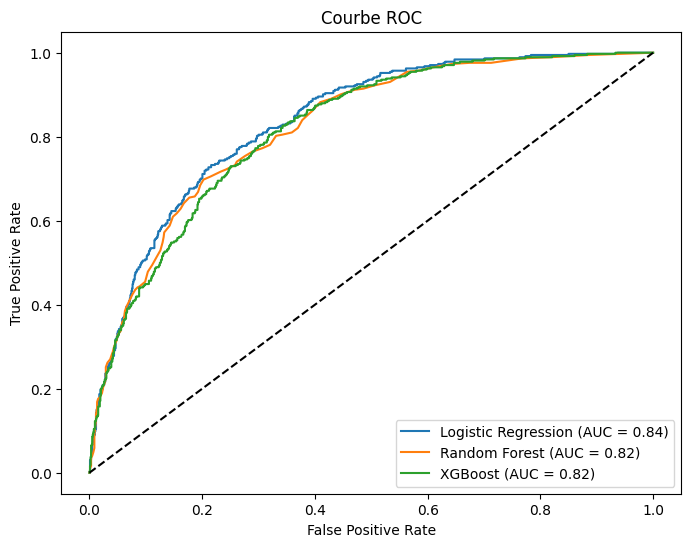

In [6]:
def plot_roc(y_test, y_proba, label):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8,6))
plot_roc(y_test, y_proba_logreg, 'Logistic Regression')
plot_roc(y_test, y_proba_rf, 'Random Forest')
plot_roc(y_test, y_proba_xgb, 'XGBoost')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## Matrice de confusion et rapport de classification

In [7]:
for name, y_pred in [('Logistic Regression', y_pred_logreg), ('Random Forest', y_pred_rf), ('XGBoost', y_pred_xgb)]:
    print(f'{name}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Logistic Regression
[[926 107]
 [180 194]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Random Forest
[[941  92]
 [208 166]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407

XGBoost
[[883 150]
 [169 205]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.58      0.55      0.56       374

    accuracy                           0.77      1407
   macro avg     